# The Tsiolkovsky Rocket Equation

## History

## The Mathematics of Rocketry

The Tsiolkovsky Rocket Equation calculates the maximum change in velocity (delta-v) a rocket can achieve. It is given by:

$$ \Delta v = I_{sp} \cdot g_0 \cdot \ln\left(\frac{m_0}{m_f}\right) $$

- $\Delta v$: Delta-v (change in velocity), the ultimate "currency" of space travel.
- $I_{sp}$: Specific Impulse, a measure of engine efficiency. Units are in seconds.
- $g_0$: Standard gravity (~9.81 m/s²), a constant used to normalize the units of Isp.
- $\ln$: The natural logarithm.
- $m_0$: The initial total mass (rocket + propellant + payload), also called "wet mass".
- $m_f$: The final mass (rocket + payload, after all propellant is burned), also called "dry mass".
- $m_0 / m_f$: The mass ratio, a critical factor in rocket performance.

In [2]:
import pandas as pd
import numpy as np

#### Analysis - Comparing Capabilities

- Define the rocket equation as a Python function.
- Calculate the mass ratio and the ideal Δv for each rocket.

In [22]:
# --- Constants and Function Definition ---
G0 = 9.80665  # Standard gravity in m/s^2

def calculate_delta_v(isp, m0, mf):
    """
    Calculates delta-v using the Tsiolkovsky rocket equation in a vectorized way.
    Handles invalid mass ratios by returning 0.
    """
    # Ensure inputs are numeric, coercing errors to NaN (Not a Number)
    m0 = pd.to_numeric(m0, errors='coerce')
    mf = pd.to_numeric(mf, errors='coerce')
    isp = pd.to_numeric(isp, errors='coerce')
    
    # Create a mask for invalid conditions (including NaN from coercion)
    invalid_mask = (m0 <= mf) | (mf <= 0) | m0.isna() | mf.isna() | isp.isna()
    
    # Calculate mass ratio, avoiding division by zero or invalid inputs
    mass_ratio = np.where(invalid_mask, 1, m0 / mf)
    
    # Calculate delta-v. The log of 1 is 0, so invalid cases naturally become 0.
    delta_v = isp * G0 * np.log(mass_ratio)
    
    return delta_v


# --- Load Data from External CSV File ---
try:
    # This is the only line you need to change to load your data!
    df_rockets = pd.read_csv('rockets_dataset.csv')
    print("Successfully loaded rockets_dataset.csv")
except FileNotFoundError:
    print("Error: rockets.csv not found. Make sure the file is in the same directory as your notebook.")
    # You might want to stop execution here or create an empty DataFrame
    df_rockets = pd.DataFrame()

# --- Perform Calculations if the DataFrame loaded correctly ---
if not df_rockets.empty:
    # Rename columns for easier access in code (optional but good practice)
    # This creates a bridge between the 'pretty' CSV headers and code variables
    df_rockets = df_rockets.rename(columns={
        'Liftoff Mass (t)': 'm0_t',
        'Final Mass (t)': 'mf_t',
        'Isp (vacuum)': 'isp_s'
    })
    
    # Calculate Mass Ratio and Delta-V
    df_rockets['Mass Ratio'] = df_rockets['m0_t'] / df_rockets['mf_t']
    df_rockets['Ideal Delta-V (m/s)'] = calculate_delta_v(
        df_rockets['isp_s'],
        df_rockets['m0_t'],
        df_rockets['mf_t']
    )
    
    # Display the results
    print("\n--- Rocket Capabilities (Simplified Single-Stage Δv) ---")
    display(df_rockets.sort_values('Ideal Delta-V (m/s)', ascending=False))

Successfully loaded rockets_dataset.csv

--- Rocket Capabilities (Simplified Single-Stage Δv) ---


,Rocket,m0_t,mf_t,isp_s,Era,Country,Notes,Mass Ratio,Ideal Delta-V (m/s)
7,Ariane 5 ECA,780.0,34.0,432,Workhorse,Europe,ESA's reliable heavy-lift launcher,22.941176,13272.587112
6,Space Shuttle,2030.0,104.0,452,Workhorse,USA,First reusable spacecraft system,19.519231,13171.045640
4,Saturn V,2970.0,130.0,421,Moon Race,USA,Apollo moon rocket; most powerful ever flown,22.846154,12917.491496
5,N1,2820.0,90.0,325,Moon Race,USSR,Soviet moon rocket; failed on all launches,31.333333,10978.758562
12,Falcon 9 (expendable),549.0,27.2,348,Modern,USA,Market-leading reusable rocket,20.183824,10254.801656
10,Long March 5,870.0,87.0,440,Workhorse,China,China's primary heavy-lift rocket,10.000000,9935.484285
13,Starship (Full Stack),5000.0,300.0,360,Modern,USA,Next-gen fully-reusable super heavy-lift,16.666667,9932.448314
11,PSLV,335.0,40.0,453,Workhorse,India,India's versatile medium-lift workhorse,8.375000,9441.241847
9,Soyuz-FG,308.0,25.0,330,Workhorse,Russia,Reliable crew launcher for the ISS,12.320000,8126.809161
8,Proton-M,713.0,64.0,330,Workhorse,Russia,Long-serving Russian heavy-lift rocket,11.140625,7801.165080


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

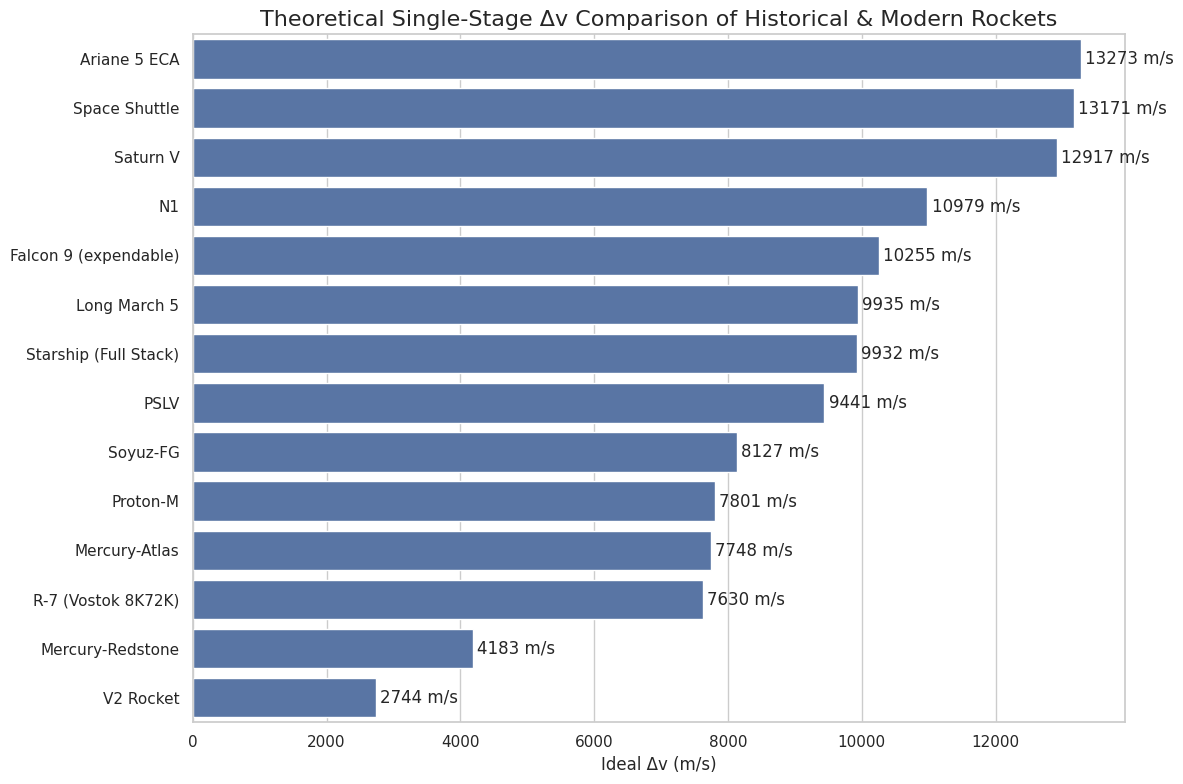

In [26]:
# Cell for Visualization

# Set a nice style for the plot
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 8)) # Make the figure larger to accommodate all the rockets

# Create the bar plot, ordering by Delta-V
ax = sns.barplot(
    x='Ideal Delta-V (m/s)',
    y='Rocket',
    data=df_rockets.sort_values('Ideal Delta-V (m/s)', ascending=False)
)

ax.set_title('Theoretical Single-Stage Δv Comparison of Historical & Modern Rockets', fontsize=16)
ax.set_xlabel('Ideal Δv (m/s)', fontsize=12)
ax.set_ylabel('')

# Add the values as labels on the bars for clarity
ax.bar_label(ax.containers[0], fmt='%.0f m/s', padding=3)

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [27]:
# Define the nodes (locations) in our map.
# The dictionary stores attributes for each node, like its label and plotting position.
# We will define the (x, y) positions manually for a nice, traditional layout.
# Layout: Ground -> LEO -> Interplanetary -> Destinations
solar_system_nodes = {
    'Earth_Surface': {'label': 'Earth Surface', 'pos': (0, 0)},
    'LEO': {'label': 'Low Earth Orbit', 'pos': (0, 2)},
    'GTO': {'label': 'Geostationary\nTransfer Orbit', 'pos': (2, 3)},
    'GEO': {'label': 'Geostationary\nOrbit', 'pos': (2, 4)},
    'EM_L1': {'label': 'Earth-Moon L1', 'pos': (4, 3)},
    'LLO': {'label': 'Low Lunar Orbit', 'pos': (4, 4)},
    'Moon_Surface': {'label': 'Moon Surface', 'pos': (4, 5)},
    'Mars_Transfer': {'label': 'Mars Transfer', 'pos': (6, 2)},
    'Mars_Orbit': {'label': 'Mars Orbit', 'pos': (8, 2)},
    'Mars_Surface': {'label': 'Mars Surface', 'pos': (8, 3)},
    'Phobos_Surface': {'label': 'Phobos Surface', 'pos': (8, 1)},
}

# Define the edges (travel legs) and their Δv cost in m/s.
# Format: (start_node, end_node, delta_v_cost)
solar_system_edges = [
    # Earth System
    ('Earth_Surface', 'LEO', 9400),
    ('LEO', 'GTO', 2500),
    ('GTO', 'GEO', 1500),
    
    # Earth to Moon
    ('LEO', 'EM_L1', 3260),
    ('EM_L1', 'LLO', 770),
    ('LLO', 'Moon_Surface', 1730),
    
    # Earth to Mars
    ('LEO', 'Mars_Transfer', 3600), # Trans-Mars Injection
    ('Mars_Transfer', 'Mars_Orbit', 900), # Mars Orbit Insertion
    ('Mars_Orbit', 'Mars_Surface', 4100),
    ('Mars_Orbit', 'Phobos_Surface', 700),
]

In [29]:
import networkx as nx

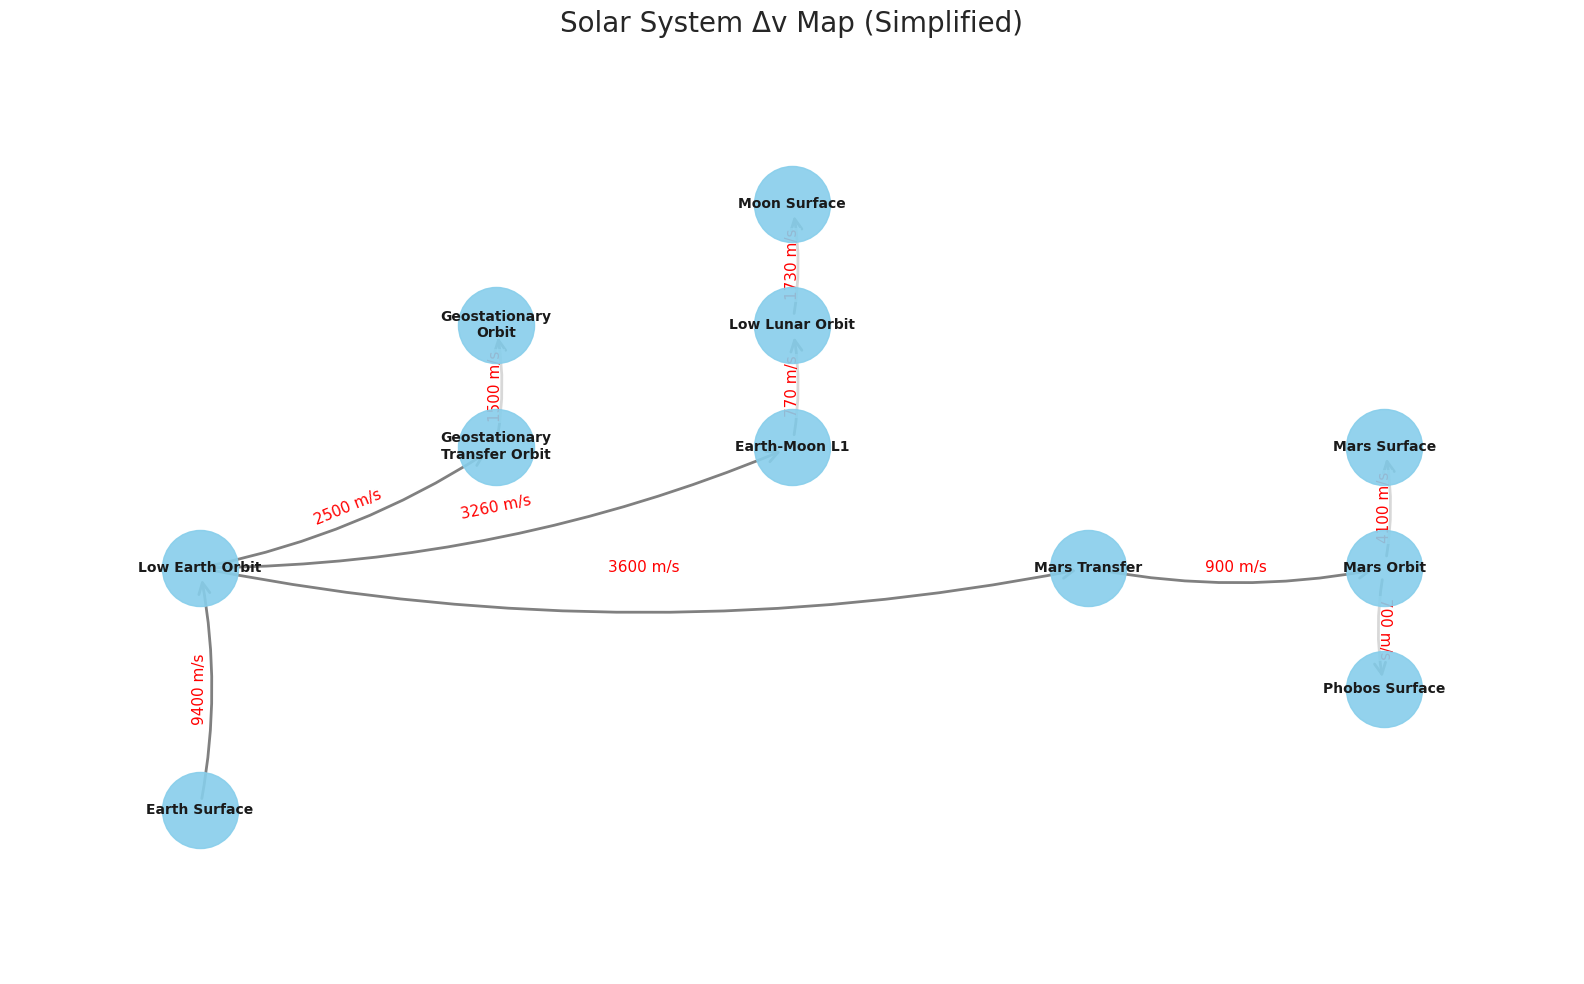

In [30]:
# 1. Create a Graph object
G = nx.DiGraph() # A DiGraph is a "Directed Graph", since travel A->B is not the same as B->A

# 2. Add the nodes and edges from our data structures
for node, attrs in solar_system_nodes.items():
    G.add_node(node, label=attrs['label'], pos=attrs['pos'])

for start, end, weight in solar_system_edges:
    G.add_edge(start, end, dv=weight)

# 3. Get positions and labels for plotting
pos = nx.get_node_attributes(G, 'pos')
node_labels = nx.get_node_attributes(G, 'label')
edge_labels = nx.get_edge_attributes(G, 'dv')

# 4. Create the plot using Matplotlib
plt.figure(figsize=(16, 10))
ax = plt.gca()
ax.set_title('Solar System Δv Map (Simplified)', fontsize=20)

# 5. Draw the graph components
# Draw the nodes
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color='skyblue', alpha=0.9)

# Draw the node labels
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10, font_weight='bold')

# Draw the edges
nx.draw_networkx_edges(G, pos,
                       edge_color='gray',
                       width=2,
                       arrowstyle='->',
                       arrowsize=20,
                       connectionstyle='arc3,rad=0.1') # Use arcs for clarity

# Draw the edge labels (the delta-v values)
nx.draw_networkx_edge_labels(G, pos,
                             edge_labels={k: f"{v} m/s" for k, v in edge_labels.items()},
                             font_color='red',
                             font_size=11,
                             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1))

# 6. Customize and show the plot
plt.margins(0.1, 0.2) # Add some padding
plt.axis('off') # Hide the axes
plt.tight_layout()
plt.show()